# Digit Recognizer

The objective is recognize digits in images and classify them.

Link: <a href="https://www.kaggle.com/c/digit-recognizer">Kaggle challenge</a>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

### Creating functions

In [2]:
def show_image(arr, label):
    pixels = np.reshape(arr, (28, 28))
    plt.imshow(pixels)
    plt.title("Digit {}".format(label))
    return plt

### Loading the training and test data set

In [3]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

The image has 28 pixels of height and 28 pixels of width. The area of a square is the multiplication of height and width.

In [4]:
test.shape

(28000, 784)

<module 'matplotlib.pyplot' from 'c:\\users\\msgru\\anaconda2\\envs\\tensorflow-py35\\lib\\site-packages\\matplotlib\\pyplot.py'>

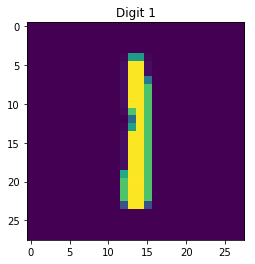

In [5]:
label = train.iloc[:,0]
images = train.iloc[:,1:]

# show digit 1
show_image(images.iloc[2,:].values, label.iloc[2])

In [6]:
images = images.values.astype(float)
images  

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
label.values

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [42]:
label_test = test.iloc[:,0]
images_test = test.iloc[:,1:].values.astype(float)

In [9]:
# Our application logic will be added here
def cnn_model_fn(features, labels, mode):
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=10)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])
    }
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

### Executing the model

In [38]:
###################################
####### Create the Estimator ######
mnist_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir="C:\\Users\\msgru\\Documents\\Git\\Outros\\Tensorflow\\Tutorial1\\Digit Recognizer\\mnist_convnet_model")

##########################################
###### Set up logging for predictions
###### Log the values in the "Softmax" tensor with label "probabilities"
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

##############################
####### Train the model ######
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": images},
    y=label,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

mnist_classifier.train(
    input_fn=train_input_fn,
    steps=500,
    hooks=[logging_hook])
###############################

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_is_chief': True, '_master': '', '_tf_random_seed': None, '_train_distribute': None, '_task_type': 'worker', '_model_dir': 'C:\\Users\\msgru\\Documents\\Git\\Outros\\Tensorflow\\Tutorial1\\Digit Recognizer\\mnist_convnet_model', '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F22C75C9B0>, '_num_ps_replicas': 0, '_service': None, '_evaluation_master': '', '_num_worker_replicas': 1, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_global_id_in_cluster': 0, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None, '_save_summary_steps': 100}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\msgru\Documents\Git\Outros\Tensorflow\Tutoria

INFO:tensorflow:step = 3502, loss = 0.06829816848039627
INFO:tensorflow:probabilities = [[0.         0.         0.00000014 0.0000054  0.         0.00000068
  0.00000006 0.         0.99999309 0.00000062]
 [0.         0.         0.00000005 0.00000266 0.         0.00124482
  0.         0.         0.99875245 0.00000001]
 [0.00000005 0.00000001 0.         0.0000001  0.99998015 0.00000008
  0.00000001 0.00001931 0.0000002  0.00000008]
 [0.         0.         0.         0.99999881 0.         0.00000074
  0.         0.         0.0000004  0.00000004]
 [0.00000112 0.00000061 0.00000218 0.00000019 0.99995449 0.00000006
  0.00000002 0.00002455 0.00000257 0.00001421]
 [0.00000528 0.00000009 0.00000003 0.00000004 0.00000135 0.00000645
  0.99998527 0.00000001 0.00000145 0.00000003]
 [0.00000005 0.99998479 0.00000214 0.00000004 0.00000005 0.00000001
  0.00000001 0.00000025 0.00001241 0.00000025]
 [0.         0.00000025 0.00001419 0.00000032 0.0000205  0.00000103
  0.00000047 0.0000003  0.99996197 0.00

INFO:tensorflow:global_step/sec: 1.79398
INFO:tensorflow:probabilities = [[0.         0.00000001 0.00000002 0.00000002 0.00001091 0.00001749
  0.00000001 0.00000132 0.00000011 0.99997012]
 [0.00001493 0.         0.00000001 0.         0.00000716 0.00000007
  0.99997776 0.00000002 0.         0.00000004]
 [0.00000256 0.99823369 0.00002665 0.0000337  0.00004154 0.00000158
  0.00001278 0.00100078 0.0005395  0.00010722]
 [0.         0.00000002 0.00000236 0.99999716 0.         0.00000006
  0.         0.00000004 0.00000031 0.00000005]
 [0.00000023 0.00000191 0.00006244 0.00016464 0.00000885 0.00000014
  0.00000019 0.00000344 0.99944742 0.00031074]
 [0.99999978 0.         0.         0.00000002 0.         0.
  0.00000014 0.00000002 0.00000003 0.        ]
 [0.00000039 0.00233171 0.00004517 0.00001603 0.00000263 0.00000001
  0.         0.99755309 0.00001802 0.00003296]
 [0.00000002 0.         0.00000001 0.         0.9999772  0.
  0.00000012 0.00000007 0.         0.00002257]
 [0.00379459 0.00035695

INFO:tensorflow:step = 3602, loss = 0.11070145666599274 (55.747 sec)
INFO:tensorflow:probabilities = [[0.00635955 0.00191099 0.95284349 0.03655582 0.00000028 0.00000003
  0.00091427 0.00006554 0.00134845 0.00000158]
 [0.00021681 0.00011817 0.39422491 0.0128748  0.50650966 0.0061507
  0.00003185 0.07979955 0.00005346 0.0000201 ]
 [0.00000004 0.00000044 0.00008971 0.00004008 0.00017095 0.25180405
  0.00000088 0.00540559 0.11152074 0.63096752]
 [0.00000024 0.00014725 0.00000159 0.00000515 0.00000022 0.00000002
  0.         0.99983017 0.00000582 0.00000954]
 [0.         0.0000001  0.00000642 0.99997778 0.00000001 0.00001549
  0.         0.00000002 0.00000015 0.00000003]
 [0.00000087 0.00000545 0.99984445 0.00000125 0.00000245 0.00000326
  0.00000018 0.00000001 0.0000994  0.00004268]
 [0.99998765 0.         0.00000011 0.         0.         0.00000002
  0.00001212 0.00000001 0.00000009 0.00000001]
 [0.01080869 0.00000024 0.01376809 0.00000014 0.00000001 0.00000018
  0.00006822 0.00000003 0.9

INFO:tensorflow:global_step/sec: 1.78045
INFO:tensorflow:probabilities = [[0.         0.00000001 0.00000002 0.00017024 0.00000826 0.97402096
  0.00001401 0.         0.00732288 0.01846362]
 [0.00000007 0.0000014  0.00002571 0.99983648 0.         0.00000314
  0.00000018 0.00000005 0.00013191 0.00000106]
 [0.         0.         0.00000006 0.00000023 0.         0.99875381
  0.00000022 0.         0.00124567 0.        ]
 [0.00000024 0.         0.00000002 0.         0.00000002 0.00000418
  0.9999955  0.         0.00000004 0.        ]
 [0.00000005 0.00000001 0.00007023 0.99877806 0.         0.00000037
  0.         0.00000603 0.00000092 0.00114433]
 [0.00000001 0.00000037 0.99980699 0.0001784  0.00000034 0.
  0.         0.00000024 0.00000957 0.00000409]
 [0.0001655  0.00161385 0.00001112 0.00001343 0.00000564 0.00156012
  0.99636619 0.00000119 0.00026234 0.00000061]
 [0.0001053  0.         0.00000031 0.00000001 0.00000071 0.00000008
  0.99988901 0.         0.00000052 0.00000407]
 [0.99963314 0.

INFO:tensorflow:step = 3702, loss = 0.09104091674089432 (56.164 sec)
INFO:tensorflow:probabilities = [[0.01277948 0.00000027 0.00000219 0.0000205  0.00001212 0.00556939
  0.98154569 0.00001898 0.00000372 0.00004765]
 [0.         0.00000002 0.00000007 0.99997165 0.00000003 0.00002553
  0.         0.         0.00000242 0.00000028]
 [0.         0.         0.00000006 0.00000092 0.         0.
  0.         0.99999899 0.00000002 0.00000001]
 [0.         0.00000005 0.00000064 0.00000407 0.99990985 0.00000457
  0.00000002 0.00001527 0.0000035  0.00006202]
 [0.00156536 0.00001004 0.98957377 0.00096079 0.00000904 0.0069372
  0.00000098 0.00002541 0.00008049 0.00083692]
 [0.         0.00000001 0.00000005 0.         0.         0.00000002
  0.         0.99997843 0.00000001 0.00002148]
 [0.00000164 0.00000021 0.00000003 0.00000724 0.00041857 0.94091687
  0.00003883 0.00000008 0.05715745 0.00145906]
 [0.00000269 0.00000148 0.00012549 0.00143057 0.0000008  0.99332555
  0.00053505 0.00007478 0.00408762 

INFO:tensorflow:global_step/sec: 1.96236
INFO:tensorflow:probabilities = [[0.         0.         0.99999995 0.00000002 0.         0.
  0.         0.         0.00000003 0.        ]
 [0.00009382 0.00000166 0.000001   0.00028876 0.00000005 0.06210381
  0.01639589 0.00000006 0.92111181 0.00000314]
 [0.         0.         0.         0.99999985 0.         0.
  0.         0.         0.00000015 0.        ]
 [0.9922889  0.00056327 0.00439954 0.00001127 0.00067422 0.00000016
  0.00166948 0.00002837 0.00032634 0.00003846]
 [0.00000005 0.00000001 0.00000015 0.00000013 0.00000009 0.00000001
  0.         0.99998483 0.00000054 0.00001419]
 [0.00000146 0.00000002 0.00000004 0.00000016 0.00000002 0.00000104
  0.99999608 0.         0.00000117 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.00000001 0.00000555 0.99873086 0.0000052  0.         0.00000002
  0.00000001 0.0000001  0.00125826 0.        ]
 [0.99288682 0.00000628 0.00595

INFO:tensorflow:step = 3802, loss = 0.06248491629958153 (50.971 sec)
INFO:tensorflow:probabilities = [[0.00000001 0.00000008 0.         0.00000005 0.99996738 0.00000001
  0.00000005 0.00000563 0.0000002  0.00002659]
 [0.00002236 0.00000011 0.00000007 0.00000034 0.00003345 0.00002284
  0.00000025 0.99972069 0.00000008 0.00019982]
 [0.00000061 0.99990966 0.00000308 0.00000154 0.00005751 0.00000002
  0.00000388 0.00000207 0.0000168  0.00000484]
 [0.99993234 0.00000001 0.00001359 0.00000698 0.         0.00000356
  0.00000033 0.00000029 0.00001071 0.00003218]
 [0.00000026 0.00002118 0.99966922 0.00004658 0.00000057 0.00000016
  0.00000003 0.00001091 0.00019671 0.00005438]
 [0.00001062 0.99941629 0.00021029 0.0000161  0.00026002 0.00000048
  0.00000866 0.0000015  0.00005605 0.00002001]
 [0.         0.00000017 0.00000309 0.99969737 0.00000014 0.00029853
  0.         0.00000002 0.00000004 0.00000062]
 [0.         0.00000002 0.         0.         0.99999533 0.00000044
  0.00000001 0.00000021 0.

INFO:tensorflow:global_step/sec: 1.98935
INFO:tensorflow:probabilities = [[0.00001137 0.00000298 0.00000748 0.00001741 0.96968653 0.00007145
  0.01628998 0.00008107 0.01334372 0.00048801]
 [0.9998428  0.         0.00000887 0.00000307 0.         0.00000038
  0.00009852 0.00002225 0.00001016 0.00001393]
 [0.         0.00000001 0.00000001 0.00000002 0.99996048 0.
  0.         0.00000982 0.00000121 0.00002845]
 [0.00000003 0.00000671 0.99925714 0.00000803 0.00000065 0.00000049
  0.00000038 0.00032108 0.00039607 0.00000942]
 [0.20855947 0.00015057 0.00023263 0.00002016 0.00038495 0.00332226
  0.78505482 0.00000614 0.00225932 0.00000969]
 [0.00000078 0.0041829  0.0001224  0.00000033 0.9949084  0.00001991
  0.00002072 0.00003301 0.00040959 0.00030197]
 [0.00187764 0.12904189 0.0000192  0.038054   0.04198441 0.38137838
  0.00049698 0.00074201 0.38718966 0.01921582]
 [0.00000094 0.0001569  0.00002279 0.00000145 0.00002526 0.00000017
  0.         0.94665812 0.00011488 0.05301949]
 [0.00000002 0.

INFO:tensorflow:step = 3902, loss = 0.07390040904283524 (50.255 sec)
INFO:tensorflow:probabilities = [[0.         0.99998968 0.00000023 0.00000004 0.00000036 0.00000003
  0.00000061 0.00000855 0.00000022 0.00000027]
 [0.00000055 0.9999911  0.00000415 0.00000177 0.00000107 0.00000001
  0.00000004 0.00000006 0.00000119 0.00000006]
 [0.99998241 0.00000013 0.         0.00000877 0.         0.00000602
  0.00000235 0.00000004 0.00000017 0.0000001 ]
 [0.99999985 0.         0.         0.00000008 0.         0.
  0.         0.         0.         0.00000006]
 [0.         0.         0.00000022 0.99999949 0.         0.00000021
  0.         0.         0.00000001 0.00000007]
 [0.         0.         0.00000002 0.99999875 0.         0.
  0.         0.         0.00000122 0.        ]
 [0.         0.         0.         0.00035313 0.         0.99422294
  0.00000004 0.00000042 0.00168713 0.00373634]
 [0.99988569 0.00000007 0.0000238  0.00000056 0.00000015 0.00000003
  0.00000024 0.00005083 0.00001357 0.00002

INFO:tensorflow:Saving checkpoints for 4001 into C:\Users\msgru\Documents\Git\Outros\Tensorflow\Tutorial1\Digit Recognizer\mnist_convnet_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.025002919137477875.
